# Energy of a proton

Proton therapy delivers a targeted radiation dose on a tumor. _Dose_ is a quantity which is the measure of the energy deposited in matter by ionizing radiation per unit mass. The location and quantity of the dose depends on the energy of a proton. 

The energy of a moving proton is a combination of its rest mass and kinetic energy. Because the velocity of a proton is close to the speed of light, relativistic effects cannot be ignored. The total mass $E_T$ of a proton is given by the [energy-momentum relation](https://en.wikipedia.org/wiki/Energy%E2%80%93momentum_relation): 

$$
E_T^2 = E_0^2 + E_k^2 
$$

with rest energy $E_0 = m_0c^2$, rest mass $m_0$ is the rest mass, and kinetic energy $E_k=pc$. The typical kinetic energy of protons in radiation therapy is 100 to 250 MeV (Note: _However, a treatment system that can produce 250 MeV protons must provide adequate neutron shielding for neutrons produced by interactions of a beam of this energy in the treatment head and in a patient._, Sengbush et al.). 

The [relativistic expression](https://en.wikipedia.org/wiki/Kinetic_energy#Relativistic_kinetic_energy) for linear momentum $p$ is 

$$
p = m_0\gamma v
$$
with 
$$
\gamma=\sqrt{1-\beta}^{-1}
$$
and $\beta=v/c$. Here $v$ is the particle's velocity. Rearranging a bit leads to this formula:

$$
E_k = (\gamma-1)E_0
$$

Rewriting this to a function of beta yields:

$$
\beta = \sqrt{1-\left(\frac{E_k}{E_0} + 1\right)^{-2}}
$$

## Velocity of a proton
The velocity is then computed as $v = \beta c$:

In [2]:
# Constants
mp = 1.67262e-27 # rest mass of proton [kg-1]
c = 299792458 # speed of light [ms^-1]

# Rest energy of proton
Joule2MeV = lambda J: J/1.602176634e-13 # conversion from Joule to MeV

E0 = mp*c**2  # in kgms^-2 === Joule

# Convert to MeV
E0 = Joule2MeV(E0)

# Variables
Ek = 250 # MeV

# Functions
beta = lambda Ek:  (1-(Ek/E0 + 1)**-2)**0.5

# given an energy beam of 250 MeV, the total energy is 
Et = (Ek**2 + E0**2)**0.5

# Velocity of a proton
b = beta(Ek)
v = b*c

# Answer
print(f"The velocity of particles in a {Ek} MeV proton beam is {v/1000:.0f} km/s, or {b*100:.5} % the speed of light")



The velocity of particles in a 250 MeV proton beam is 183955 km/s, or 61.361 % the speed of light


## Proton therapy ranges
With these functions, we can plot how the energy ranges of proton therapy (100-250 MeV) compare to e.g. the LHC collider (1-7 TeV)

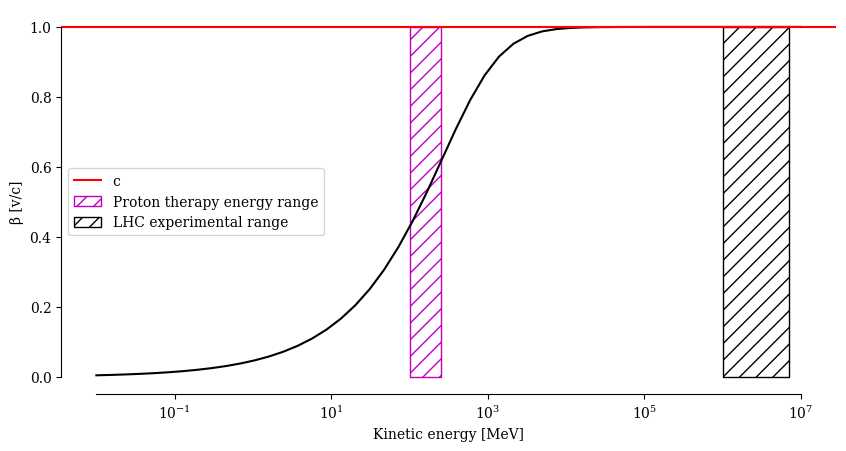

In [98]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np 

plt.rcParams['font.family'] = 'serif'
fig, ax = plt.subplots(1, figsize=(10,5))

e = np.logspace(-2, 7)

ax.plot(e, beta(e), '-k')
ax.axhline(1, color='red', label='c')

ax.fill_betweenx([0, 1], 100, 250, 
                 hatch="//",
                 edgecolor='m', 
                 facecolor="white", 
                 label="Proton therapy energy range")

ax.fill_betweenx([0, 1], 1e6, 7e6, 
                 hatch="//",
                 edgecolor='k', 
                 facecolor="white", 
                 label="LHC experimental range")

ax.set_xscale('log')
ax.set_xlabel('Kinetic energy [MeV]')
ax.set_ylabel('β [v/c]')

x_major = ticker.LogLocator(base = 10) 
x_minor = ticker.LogLocator(base = 10, subs =[1.1, 1.2, 1.3]) 
  
ax.xaxis.set_major_locator(x_major) 
ax.xaxis.set_minor_locator(x_minor)


ax.spines['left'].set_bounds(0, 1)
ax.spines['bottom'].set_bounds(e[0], e[-1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.legend()

## References

Newhauser & Zhang (2015) The physics of proton therapy. Phys Med Biol. 2015 Mar 24;60(8):R155–R209. doi: 10.1088/0031-9155/60/8/R155
Palmans, PTRAN, a Monte Carlo code for transport simulation of 50 to 250 MeV protons, http://resource.npl.co.uk/docs/science_technology/ionising%20radiation/clubs_groups/monte_carlo/2004/workshop/ptran_notes.pdf
Berger (1993) Penetration of Proton Beams Through Water I. Depth-dose Distribution, Spectra and LET Distribution https://archive.org/details/penetrationofpro5226berg/page/n2/mode/1up
Introduction to elementary particle physics: https://www.phys.ufl.edu/~korytov/tmp4/lectures/note_A10_interaction_of_particles_with_matter.pdf
Sengbush et al. Maximum proton kinetic energy and patient-generated neutron fluence considerations in proton beam arc delivery radiation therapy, Med Phys. 2009 Jan 8;36(2):364–372. doi: 10.1118/1.3049787
